Reid Norton
 - Quinn O'Connor
- Jack Joiner
 - Ratul 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [275]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 


import matplotlib.pyplot as plt
import seaborn as sns


In [282]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5


In [294]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 9)

#create and fit the model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

R2_train = LR_model.score(X_train, y_train)
R2_test = LR_model.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(LR_model.__dict__)
print(f'R2_train {R2_train:.2f}\nR2_test {R2_test:.2f}')
print(f'MSE_train {MSE_train:.2f}\nMSE_test {MSE_test:.2f}')



{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 10, 'coef_': array([ 5.83016208e+01,  7.00284337e+01, -1.14392577e+15,  9.51776224e+00,
        5.52862609e+01, -7.62617180e+14, -1.07657038e+01, -2.01788183e+00,
        1.42296032e+00,  1.90654295e+15]), 'rank_': 10, 'singular_': array([9.24819289e-01, 9.02253592e-01, 8.40518294e-01, 8.03072579e-01,
       7.64912894e-01, 6.72509526e-01, 5.71326503e-01, 5.20754110e-01,
       4.88593504e-01, 4.57777684e-16]), 'intercept_': -15.396289980594567}
R2_train 0.87
R2_test 0.87
MSE_train 8.87
MSE_test 11.91


In [284]:
print(coef)

[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]


In [285]:
print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5


#### Your written answers here

What are your model parameters?
-  y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5

What were your MSE and R^2?
 - MSE = 11.91
 - R2 = 0.87



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [292]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')



True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


In [288]:
reg2_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578


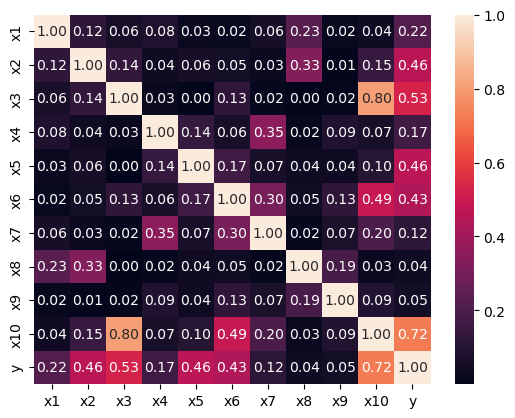

In [289]:
corr = reg2_df.corr()
sns.heatmap(np.abs(corr), annot = True, fmt = '.2f')
plt.show()

In [295]:
candidate_idx = np.array([1, 2, 3, 5, 6, 7, 10]) - 1
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3)
model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

MSE_train = mean_squared_error(y_train, model_LR.predict(Z_train))
MSE_test = mean_squared_error(y_test, model_LR.predict(Z_test))

print(f'R2_train {R2_train:.2f}\nR2_test {R2_test:.2f}')
print(f'MSE_train {MSE_train:.2f}\nMSE_test {MSE_test:.2f}')

R2_train 0.86
R2_test 0.88
MSE_train 10.20
MSE_test 8.21


#### Your written answers here

What are your model parameters?
-  y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6

Which features (x1, x2...) were significant? Which were co-linear?
 - x3 and x10 were significant, x3 was colinear with x10 and x10 was slightly colinear with x6
 
What were your MSE and R^2?
 - MSE: 8.21
 - R2: 0.88



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [296]:
import pandas as pd
housing_df = pd.read_csv('kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: >

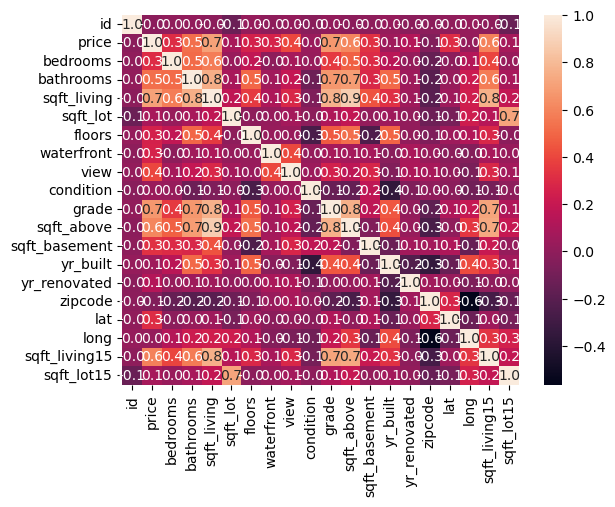

In [299]:
import pandas as pd
import seaborn as sns

# Drop the 'date' column before calculating the correlation matrix
corr_matrix = housing_df.drop(columns=['date']).corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.1f')


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [300]:
X = housing_df[['sqft_above', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test


,sqft_above,sqft_living,grade
13941,2390,2390,7
3116,2990,2990,10
4704,1250,2070,7
835,1230,1920,7
16579,1360,1960,7
...,...,...,...
4344,3810,3810,8
9620,1280,1280,7
16425,640,640,6
12692,2410,2410,9


R2_train 0.54
R2_test 0.56


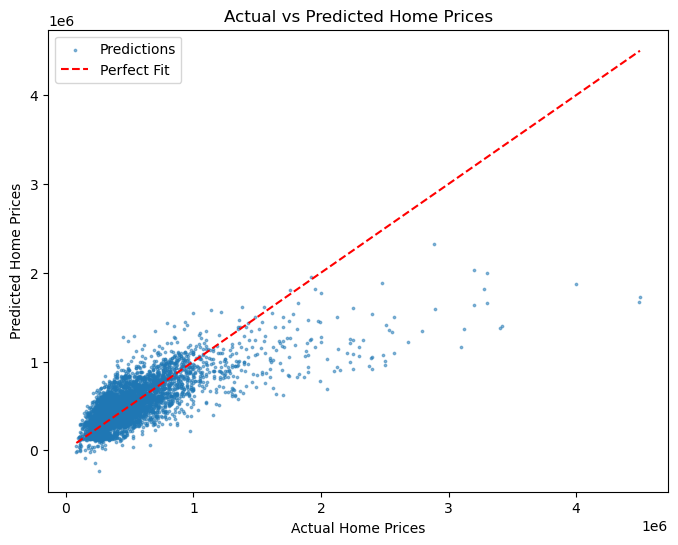

In [304]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

model = LinearRegression()
model.fit(X_scaled_train, y_train)

y_pred_train = model.predict(X_scaled_train)
y_pred_test = model.predict(X_scaled_test)

R2_train = model.score(X_scaled_train, y_train)
R2_test = model.score(X_scaled_test, y_test)
print(f'R2_train {R2_train:.2f}\nR2_test {R2_test:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predictions", s=3)
plt.plot([min(y_test['price']), max(y_test['price'])], [min(y_test['price']), max(y_test['price'])], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs Predicted Home Prices")
plt.legend()
plt.show()



In [219]:
y_test.min(), y_test.max()

(price    82500.0
 dtype: float64,
 price    4500000.0
 dtype: float64)

In [221]:
y_train

,price
20483,465000.0
10051,249900.0
3202,255000.0
19611,540000.0
9090,499950.0
...,...
5889,535000.0
9329,605000.0
499,437500.0
21600,1537000.0


#### Your written answers here
Which features are you using and why?
 
 - sqft above, sqft living, and grade, as they have the highest correlation to price in the heatmap.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 

- Plot predicted vs actual home prices for the regularized model. 

In [312]:
from sklearn.linear_model import Ridge

y = housing_df[['price']]
X = housing_df.drop(columns = ['price', 'zipcode', 'date'])
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)


alpha = 10000
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_scaled_train, y_train)

# Calculate R^2
R2_train = model_ridge.score(X_scaled_train, y_train)
R2_test = model_ridge.score(X_scaled_test, y_test)

print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')



R2_train: 0.66
R2_test: 0.65


In [313]:
ridge_coefficients = model_ridge.coef_[0]
for feature, coef in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coef}")

id: -2821.3506192452437
bedrooms: -2444.976778568345
bathrooms: 28991.222497795276
sqft_living: 56476.02294186384
sqft_lot: 4386.721988812395
floors: 9669.113620977096
waterfront: 33970.21454615917
view: 39029.60172478587
condition: 16525.9037010498
grade: 67556.78121958385
sqft_above: 49068.00597464939
sqft_basement: 25247.806543717128
yr_built: -33276.97494776329
yr_renovated: 12251.885713202359
lat: 55820.798570011364
long: -16502.00210660535
sqft_living15: 40312.32904390147
sqft_lot15: -2729.4051308109397


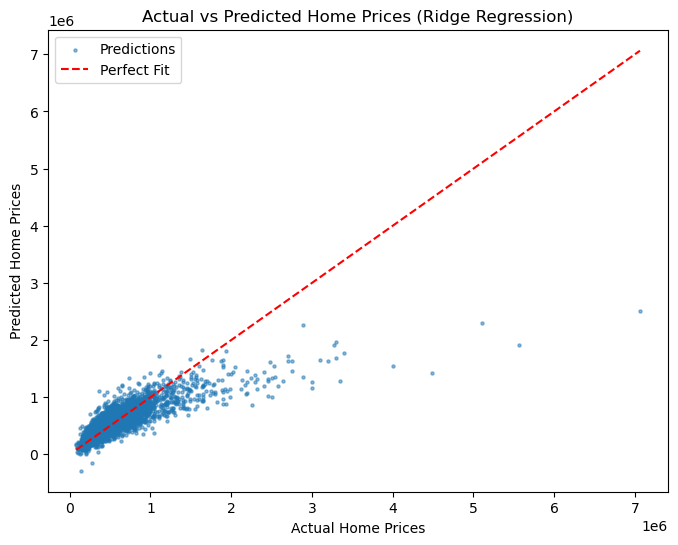

In [314]:
y_pred_train_ridge = model_ridge.predict(X_scaled_train)
y_pred_test_ridge = model_ridge.predict(X_scaled_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_ridge, alpha=0.5, label="Predictions", s=5)
plt.plot([min(y_test['price']), max(y_test['price'])], [min(y_test['price']), max(y_test['price'])], color='red', label="Perfect Fit", linestyle = '--')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs Predicted Home Prices (Ridge Regression)")
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - Ridge Regression

Does your regularized model look better than your MLR? How so?
 - A little. It seems to reduce some of the outliers (houses that were way over or undervalued)

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [316]:
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

X_below_1M = below_1M.drop(columns=['price', 'zipcode', 'date'])
y_below_1M = below_1M[['price']]
X_above_1M = above_1M.drop(columns=['price','zipcode', 'date'])
y_above_1M = above_1M[['price']]

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below_1M, y_below_1M, test_size=0.2, random_state=42)
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above_1M, y_above_1M, test_size=0.2, random_state=42)

ss = StandardScaler()
X_scaled_train_below = ss.fit_transform(X_train_below)
X_scaled_test_below = ss.transform(X_test_below)
X_scaled_train_above = ss.fit_transform(X_train_above) 
X_scaled_test_above = ss.transform(X_test_above)

alpha = 100
model_ridge_below = Ridge(alpha=alpha)
model_ridge_below.fit(X_scaled_train_below, y_train_below)
model_ridge_above = Ridge(alpha=alpha)
model_ridge_above.fit(X_scaled_train_above, y_train_above)

R2_train_below = model_ridge_below.score(X_scaled_train_below, y_train_below)
R2_test_below = model_ridge_below.score(X_scaled_test_below, y_test_below)
R2_train_above = model_ridge_above.score(X_scaled_train_above, y_train_above)
R2_test_above = model_ridge_above.score(X_scaled_test_above, y_test_above)

print(f'R2_train_below: {R2_train_below:.2f}')
print(f'R2_test_below: {R2_test_below:.2f}')
print(f'R2_train_above: {R2_train_above:.2f}')
print(f'R2_test_above: {R2_test_above:.2f}')


R2_train_below: 0.69
R2_test_below: 0.69
R2_train_above: 0.50
R2_test_above: 0.54


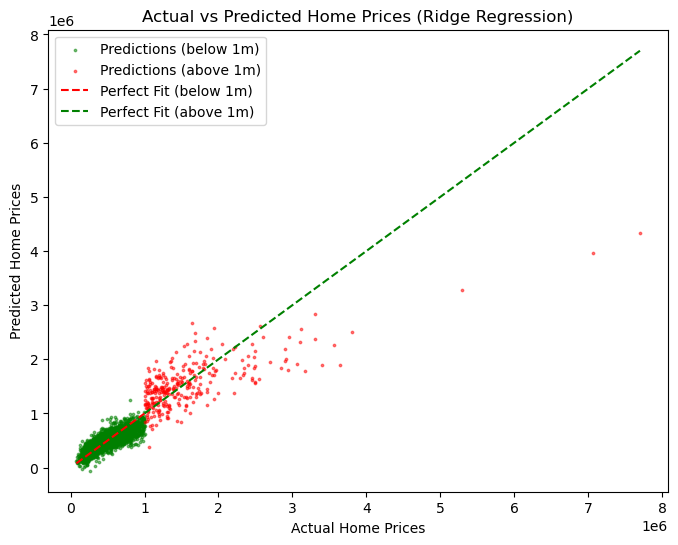

In [270]:
y_pred_train_ridge_below = model_ridge_below.predict(X_scaled_train_below)
y_pred_test_ridge_below = model_ridge_below.predict(X_scaled_test_below)
y_pred_train_ridge_above = model_ridge_above.predict(X_scaled_train_above)
y_pred_test_ridge_above = model_ridge_above.predict(X_scaled_test_above)


plt.figure(figsize=(8, 6))
plt.scatter(y_test_below, y_pred_test_ridge_below, alpha=0.5, label="Predictions (below 1m)", color = 'green', s=3)
plt.scatter(y_test_above, y_pred_test_ridge_above, alpha=0.5, label="Predictions (above 1m)", color = 'red', s=3)
plt.plot([min(y_test_below['price']), max(y_test_below['price'])], [min(y_test_below['price']), max(y_test_below['price'])], color='red', linestyle='dashed', label="Perfect Fit (below 1m)")
plt.plot([min(y_test_above['price']), max(y_test_above['price'])], [min(y_test_above['price']), max(y_test_above['price'])], color='green', linestyle='dashed', label="Perfect Fit (above 1m)")

plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs Predicted Home Prices (Ridge Regression)")
plt.legend()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Houses above 1M = 0.54
  - Houses below 1M = 0.69
 
